In [2]:
!pip install pyattck

  Preparing metadata (setup.py) ... done
  Using cached termcolor-2.5.0-py3-none-any.whl.metadata (6.1 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 17.5 MB/s eta 0:00:00
  Created wheel for fire: filename=fire-0.4.0-py2.py3-none-any.whl size=115929 sha256=4b55f3e93e2b8285f7443753d6ad65ee0188a502c006e690e74e7b9f14804a85
  Stored in directory: /Users/ibrahimmukherjee/Library/Caches/pip/wheels/2e/07/d6/a0a83630dca5ce2615bef11489b84c46692d38b393b870ec1c
Successfully built fire
  Attempting uninstall: attrs
    Found existing installation: attrs 24.2.0
    Uninstalling attrs-24.2.0:
      Successfully uninstalled attrs-24.2.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
referencing 0.35.1 requires attrs>=22.2.0, but you have attrs 21.4.0 which is incompatible.
jsonschema 4.23.0 requires attrs>=22.2.0, but you have attrs 21.4.0 which is incompatible.

In [8]:
!pip install scikit-learn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.0/11.0 MB 15.8 MB/s eta 0:00:00 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.1/23.1 MB 18.9 MB/s eta 0:00:00a 0:00:01


In [4]:
!pip install pandas

  Using cached pytz-2024.2-py2.py3-none-any.whl.metadata (22 kB)
  Using cached tzdata-2024.2-py2.py3-none-any.whl.metadata (1.4 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.4/11.4 MB 18.9 MB/s eta 0:00:00 0:00:01
Using cached pytz-2024.2-py2.py3-none-any.whl (508 kB)
Using cached tzdata-2024.2-py2.py3-none-any.whl (346 kB)


In [9]:
from pyattck import Attck
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

# Initialize MITRE ATT&CK data
attck = Attck()

# Function to extract MITRE ATT&CK techniques
def extract_techniques():
    techniques = []
    for technique in attck.enterprise.techniques:
        techniques.append({
            'id': technique.id,
            'name': technique.name,
            'description': technique.description
        })
    return pd.DataFrame(techniques)

# Function to create synthetic threat data
def create_synthetic_threat_data(num_samples=1000):
    techniques_df = extract_techniques()
    
    # Create synthetic features
    data = {
        'timestamp': pd.date_range(start='2024-01-01', periods=num_samples, freq='H'),
        'source_ip': np.random.choice(['192.168.1.' + str(i) for i in range(1, 255)], num_samples),
        'destination_ip': np.random.choice(['10.0.0.' + str(i) for i in range(1, 255)], num_samples),
        'port': np.random.randint(1, 65536, num_samples),
        'protocol': np.random.choice(['TCP', 'UDP', 'ICMP'], num_samples),
        'bytes_transferred': np.random.randint(100, 10000, num_samples),
        'technique_id': np.random.choice(techniques_df['id'], num_samples)
    }
    
    df = pd.DataFrame(data)
    
    # Add a 'threat' column (1 for threat, 0 for normal)
    df['threat'] = np.random.choice([0, 1], num_samples, p=[0.8, 0.2])  # 20% of data labeled as threats
    
    return df

# Function to process synthetic data
def process_synthetic_data(num_samples=1000):
    df = create_synthetic_threat_data(num_samples)
    
    # Split the data into features (X) and labels (y)
    X = df.drop(['threat', 'timestamp'], axis=1)
    y = df['threat']
    
    # Convert categorical variables to numeric
    X = pd.get_dummies(X, columns=['protocol', 'technique_id'])
    
    # Split into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    return X_train, y_train, X_test, y_test, df

# Main function to ingest data
def ingest_data(num_samples=1000):
    # Extract MITRE ATT&CK techniques
    techniques_df = extract_techniques()
    print("MITRE ATT&CK Techniques:")
    print(techniques_df.head())
    
    # Process synthetic dataset
    X_train, y_train, X_test, y_test, synthetic_df = process_synthetic_data(num_samples)
    print("\nSynthetic Dataset:")
    print(f"Training samples: {X_train.shape[0]}")
    print(f"Testing samples: {X_test.shape[0]}")
    print("\nSynthetic data sample:")
    print(synthetic_df.head())

    return techniques_df, X_train, y_train, X_test, y_test, synthetic_df

# Example usage
if __name__ == "__main__":
    techniques_df, X_train, y_train, X_test, y_test, synthetic_df = ingest_data(num_samples=10000)

MITRE ATT&CK Techniques:
                                                  id  \
0  attack-pattern--0042a9f5-f053-4769-b3ef-9ad018...   
1  attack-pattern--005a06c6-14bf-4118-afa0-ebcd8a...   
2  attack-pattern--005cc321-08ce-4d17-b1ea-cb5275...   
3  attack-pattern--00d0b012-8a03-410e-95de-5826bf...   
4  attack-pattern--00f90846-cbd1-4fc5-9233-df5c2b...   

                            name  \
0  Extra Window Memory Injection   
1                 Scheduled Task   
2                 Socket Filters   
3   Indicator Removal from Tools   
4            Archive via Utility   

                                         description  
0  Adversaries may inject malicious code into pro...  
1  Adversaries may abuse the Windows Task Schedul...  
2  Adversaries may attach filters to a network so...  
3  If a malicious tool is detected and quarantine...  
4  Adversaries may use utilities to compress and/...  

Synthetic Dataset:
Training samples: 8000
Testing samples: 2000

Synthetic data sample:
  

/var/folders/6j/x7h0c_d13ndg819dhry4_2br0000gn/T/ipykernel_34962/2830092740.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  'timestamp': pd.date_range(start='2024-01-01', periods=num_samples, freq='H'),


In [10]:
!pip install pandas numpy scikit-learn pyattck faker

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 18.3 MB/s eta 0:00:00


In [11]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from pyattck import Attck
from faker import Faker

# Initialize MITRE ATT&CK and Faker
attck = Attck()
fake = Faker()

def extract_techniques():
    techniques = []
    for technique in attck.enterprise.techniques:
        techniques.append({
            'id': technique.id,
            'name': technique.name,
            'description': technique.description
        })
    return pd.DataFrame(techniques)

def create_advanced_synthetic_threat_data(num_samples=1000):
    techniques_df = extract_techniques()
    
    # Create more diverse and realistic synthetic features
    data = {
        'timestamp': pd.date_range(start='2024-01-01', periods=num_samples, freq='H'),
        'source_ip': [fake.ipv4() for _ in range(num_samples)],
        'destination_ip': [fake.ipv4() for _ in range(num_samples)],
        'port': np.random.randint(1, 65536, num_samples),
        'protocol': np.random.choice(['TCP', 'UDP', 'ICMP', 'HTTP', 'HTTPS'], num_samples),
        'bytes_transferred': np.random.randint(100, 1000000, num_samples),
        'technique_id': np.random.choice(techniques_df['id'], num_samples),
        'user_agent': [fake.user_agent() for _ in range(num_samples)],
        'country_origin': [fake.country() for _ in range(num_samples)],
        'malware_family': np.random.choice(['Ransomware', 'Trojan', 'Botnet', 'Spyware', 'Rootkit', None], num_samples),
    }
    
    df = pd.DataFrame(data)
    
    # Add more realistic threat labeling
    df['threat'] = np.random.choice([0, 1], num_samples, p=[0.8, 0.2])  # 20% of data labeled as threats
    
    # Add AI-related threats
    ai_threat_mask = (df['threat'] == 1) & (np.random.rand(num_samples) < 0.1)  # 10% of threats are AI-related
    df.loc[ai_threat_mask, 'ai_generated'] = True
    df.loc[ai_threat_mask, 'ai_technique'] = np.random.choice(['Deepfake', 'GAN', 'NLP Attack'], ai_threat_mask.sum())
    
    # Add state-sponsored actor attribution
    state_actor_mask = (df['threat'] == 1) & (np.random.rand(num_samples) < 0.15)  # 15% of threats are state-sponsored
    df.loc[state_actor_mask, 'state_sponsored'] = True
    df.loc[state_actor_mask, 'attributed_country'] = np.random.choice(['North Korea', 'Russia', 'China', 'Iran'], state_actor_mask.sum())
    
    return df

def process_advanced_synthetic_data(num_samples=1000):
    df = create_advanced_synthetic_threat_data(num_samples)
    
    # Split the data into features (X) and labels (y)
    X = df.drop(['threat', 'timestamp', 'ai_generated', 'ai_technique', 'state_sponsored', 'attributed_country'], axis=1)
    y = df['threat']
    
    # Convert categorical variables to numeric
    X = pd.get_dummies(X, columns=['protocol', 'technique_id', 'country_origin', 'malware_family'])
    
    # Split into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    return X_train, y_train, X_test, y_test, df

def ingest_advanced_data(num_samples=10000):
    # Extract MITRE ATT&CK techniques
    techniques_df = extract_techniques()
    print("MITRE ATT&CK Techniques:")
    print(techniques_df.head())
    
    # Process advanced synthetic dataset
    X_train, y_train, X_test, y_test, synthetic_df = process_advanced_synthetic_data(num_samples)
    print("\nAdvanced Synthetic Dataset:")
    print(f"Training samples: {X_train.shape[0]}")
    print(f"Testing samples: {X_test.shape[0]}")
    print("\nSynthetic data sample:")
    print(synthetic_df.head())
    
    # Additional statistics
    print("\nThreat Statistics:")
    print(f"Total threats: {synthetic_df['threat'].sum()}")
    print(f"AI-generated threats: {synthetic_df['ai_generated'].sum() if 'ai_generated' in synthetic_df.columns else 0}")
    print(f"State-sponsored threats: {synthetic_df['state_sponsored'].sum() if 'state_sponsored' in synthetic_df.columns else 0}")

    return techniques_df, X_train, y_train, X_test, y_test, synthetic_df

# Example usage
if __name__ == "__main__":
    techniques_df, X_train, y_train, X_test, y_test, synthetic_df = ingest_advanced_data(num_samples=10000)

MITRE ATT&CK Techniques:
                                                  id  \
0  attack-pattern--0042a9f5-f053-4769-b3ef-9ad018...   
1  attack-pattern--005a06c6-14bf-4118-afa0-ebcd8a...   
2  attack-pattern--005cc321-08ce-4d17-b1ea-cb5275...   
3  attack-pattern--00d0b012-8a03-410e-95de-5826bf...   
4  attack-pattern--00f90846-cbd1-4fc5-9233-df5c2b...   

                            name  \
0  Extra Window Memory Injection   
1                 Scheduled Task   
2                 Socket Filters   
3   Indicator Removal from Tools   
4            Archive via Utility   

                                         description  
0  Adversaries may inject malicious code into pro...  
1  Adversaries may abuse the Windows Task Schedul...  
2  Adversaries may attach filters to a network so...  
3  If a malicious tool is detected and quarantine...  
4  Adversaries may use utilities to compress and/...  


/var/folders/6j/x7h0c_d13ndg819dhry4_2br0000gn/T/ipykernel_34962/1579148534.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  'timestamp': pd.date_range(start='2024-01-01', periods=num_samples, freq='H'),



Advanced Synthetic Dataset:
Training samples: 8000
Testing samples: 2000

Synthetic data sample:
            timestamp        source_ip   destination_ip   port protocol  \
0 2024-01-01 00:00:00  179.139.118.219  150.214.148.175   4703      TCP   
1 2024-01-01 01:00:00  130.153.140.131   194.221.16.189  18247     HTTP   
2 2024-01-01 02:00:00   200.25.206.115   160.117.40.152  12522      TCP   
3 2024-01-01 03:00:00    3.202.181.242    80.43.107.209  47603      UDP   
4 2024-01-01 04:00:00    61.161.21.154   62.165.135.198  59733     HTTP   

   bytes_transferred                                       technique_id  \
0             417719  attack-pattern--b77cf5f3-6060-475d-bd60-40ccbf...   
1             418302  attack-pattern--fb640c43-aa6b-431e-a961-a27901...   
2             559682  attack-pattern--40f5caa0-4cb7-4117-89fc-d421bb...   
3             725513  attack-pattern--3f18edba-28f4-4bb9-82c3-8aa60d...   
4             672788  attack-pattern--f44731de-ea9f-406d-9b83-30ecbb...   



Steps:
Preprocess the dataset: Extract relevant textual features (e.g., threat descriptions, attack techniques).
Generate embeddings: Use OpenELM to convert the textual data into numerical embeddings.
Cluster the embeddings: Apply a clustering algorithm (e.g., KMeans) to group similar threats based on their embeddings.
Visualize the clusters: Plot the clusters to understand how different threats are grouped.

In [14]:
!pip install matplotlib

In [22]:
!pip install torch

In [26]:
!pip install transformers

In [28]:
!pip install sentence-transformers

Generating TF-IDF features...
Clustering data...
Visualizing clusters...


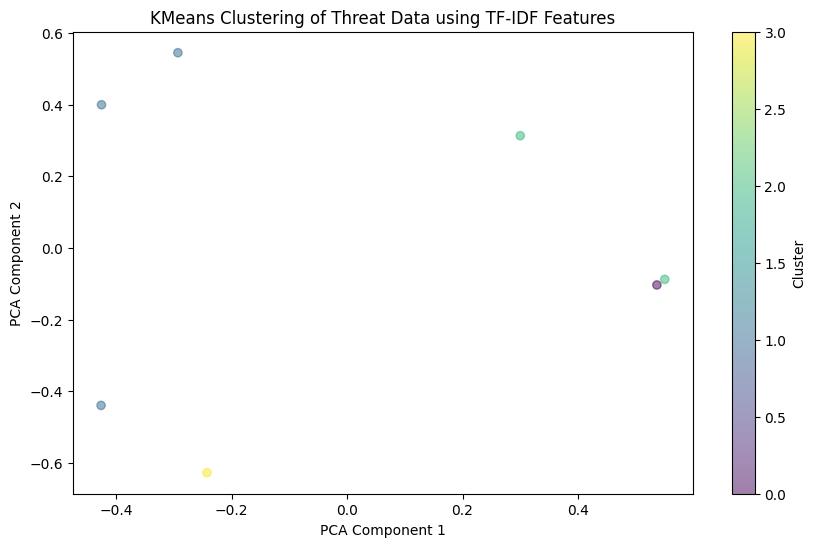

                                         description  cluster
0             Ransomware attack detected from Russia        2
1         Phishing attempt using AI-generated emails        1
2  SQL injection attack targeting financial insti...        0
3           DDoS attack originating from North Korea        2
4      Advanced persistent threat detected using GAN        1


In [31]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Function to extract textual features from dataset
def extract_textual_features(df):
    return df['description'].fillna('')

# Function to generate TF-IDF features
def generate_tfidf_features(texts):
    vectorizer = TfidfVectorizer(stop_words='english')
    return vectorizer.fit_transform(texts)

# Function to perform clustering on features
def cluster_features(features, n_clusters=5):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    clusters = kmeans.fit_predict(features)
    return clusters

# Function to visualize clusters using PCA
def visualize_clusters(features, clusters):
    pca = PCA(n_components=2)
    reduced_features = pca.fit_transform(features.toarray())

    plt.figure(figsize=(10, 6))
    scatter = plt.scatter(reduced_features[:, 0], reduced_features[:, 1], c=clusters, cmap='viridis', alpha=0.5)
    plt.title('KMeans Clustering of Threat Data using TF-IDF Features')
    plt.xlabel('PCA Component 1')
    plt.ylabel('PCA Component 2')
    plt.colorbar(scatter, label='Cluster')
    plt.show()

# Main function to process dataset and perform clustering
def process_and_cluster_threat_data(df, n_clusters=5):
    texts = extract_textual_features(df)

    print("Generating TF-IDF features...")
    features = generate_tfidf_features(texts)

    print("Clustering data...")
    clusters = cluster_features(features, n_clusters=n_clusters)

    print("Visualizing clusters...")
    visualize_clusters(features, clusters)

    df['cluster'] = clusters
    return df

# Example usage
if __name__ == "__main__":
    synthetic_df = pd.DataFrame({
        'description': [
            "Ransomware attack detected from Russia",
            "Phishing attempt using AI-generated emails",
            "SQL injection attack targeting financial institution",
            "DDoS attack originating from North Korea",
            "Advanced persistent threat detected using GAN",
            "Insider threat detected with abnormal login patterns",
            "AI-powered malware spreading via social media"
        ]
    })

    clustered_df = process_and_cluster_threat_data(synthetic_df, n_clusters=4)
    print(clustered_df.head())